# Outliers

One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy. 

If our dataset is small, we can detect the outlier by just looking at the dataset. But what 

if we have a huge dataset, how do we identify the outliers then? 

We need to use visualization and mathematical techniques.


**What are the criteria to identify an outlier?**

- Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
- Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

**What is the reason for an outlier to exists in a dataset?**

- Variability in the data
- An experimental measurement error

**What are the impacts of having outliers in a dataset?**

- It causes various problems during our statistical analysis
- It may cause a significant impact on the mean and the standard deviation

**Various ways of finding the outlier.**

- Using scatter plots
- Box plot
- using z score
- using the IQR interquantile range



### Boxplots

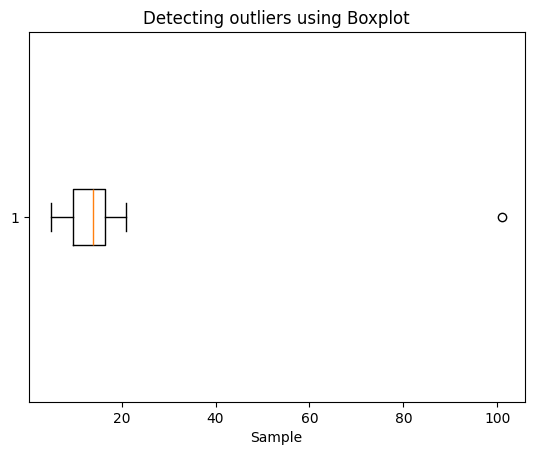

In [1]:
import matplotlib.pyplot as plt

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('data samples')
plt.show()

### Z-scores

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ



**Criteria**: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

**Steps**

- Loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
- Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [2]:
import numpy as np
data = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

In [3]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


### Inter Quantile Range(IQR)

**Criteria**: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

**Steps**

- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute 
        ```
        lower bound = (Q1–1.5*IQR)
        upper bound = (Q3+1.5*IQR)
        ```

- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [4]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]
